In [219]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [220]:
data = pd.read_csv("musteriler.csv")
data

,No,Cinsiyet,Yas,Hacim,Maas
0,1,K,60,69900,6325
1,2,K,30,79000,5200
2,3,E,52,85500,7825
3,4,E,57,17100,8375
4,5,E,55,5500,5450
...,...,...,...,...,...
195,196,E,22,96600,7900
196,197,E,39,83700,7675
197,198,K,25,34000,4000
198,199,K,30,42000,5500


In [221]:
data = data.drop("No",axis=1)
cinsiyet_kolonu = data["Cinsiyet"].values
data = data.drop("Cinsiyet",axis=1)

In [222]:
from sklearn import preprocessing
encoder = preprocessing.LabelEncoder()
encoder.fit(cinsiyet_kolonu)
cinsiyet_encoded = encoder.transform(cinsiyet_kolonu)
cinsiyet_encoded   # K=1 , E=0

array([1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1])

In [223]:
cinsiyet_serisi = pd.Series(cinsiyet_encoded, name="Cinsiyet")
dataframe = pd.concat([data,cinsiyet_serisi],axis=1)
dataframe

,Yas,Hacim,Maas,Cinsiyet
0,60,69900,6325,1
1,30,79000,5200,1
2,52,85500,7825,0
3,57,17100,8375,0
4,55,5500,5450,0
...,...,...,...,...
195,22,96600,7900,0
196,39,83700,7675,0
197,25,34000,4000,1
198,30,42000,5500,1


In [224]:
X_23 = data[["Hacim","Maas"]].values

In [225]:
from sklearn.cluster import KMeans
k_means = KMeans(n_clusters=3, init="k-means++")
k_means.fit(X_23)

KMeans(n_clusters=3)

In [226]:
k_means.cluster_centers_    # 3 tane küme merkez koordinatı

array([[ 58911.76470588,   5865.44117647],
       [104386.95652174,   7289.13043478],
       [ 22282.55813953,   5310.75581395]])

Text(0, 0.5, 'Maas')

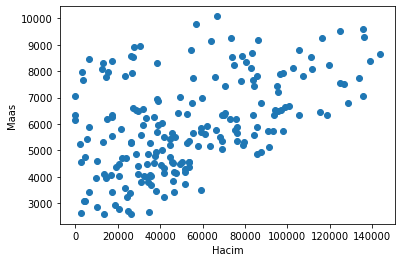

In [227]:
plt.scatter(data["Hacim"],data["Maas"])
plt.xlabel("Hacim")
plt.ylabel("Maas")

In [228]:
data["Kume_Tahmin1"] = k_means.predict(X_23)
data

,Yas,Hacim,Maas,Kume_Tahmin1
0,60,69900,6325,0
1,30,79000,5200,0
2,52,85500,7825,1
3,57,17100,8375,2
4,55,5500,5450,2
...,...,...,...,...
195,22,96600,7900,1
196,39,83700,7675,1
197,25,34000,4000,2
198,30,42000,5500,0


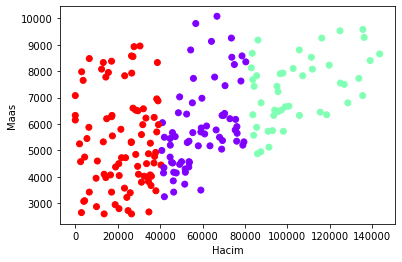

In [229]:
plt.scatter(data["Hacim"],data["Maas"],c=data["Kume_Tahmin1"],cmap="rainbow")
plt.xlabel("Hacim")
plt.ylabel("Maas")
plt.show()

In [230]:
k_means.inertia_   # WCSS değeri ne kadar yüksek olursa model o kadar başarılıdır

37357508127.21184

In [231]:
from sklearn import preprocessing
x_scaled = preprocessing.scale(X_23)

In [232]:
from sklearn.cluster import KMeans
k_means2 = KMeans(n_clusters=2, init="k-means++")
data["Kume_Tahmin2"] = k_means2.fit_predict(x_scaled)
data

,Yas,Hacim,Maas,Kume_Tahmin1,Kume_Tahmin2
0,60,69900,6325,0,0
1,30,79000,5200,0,0
2,52,85500,7825,1,0
3,57,17100,8375,2,1
4,55,5500,5450,2,1
...,...,...,...,...,...
195,22,96600,7900,1,0
196,39,83700,7675,1,0
197,25,34000,4000,2,1
198,30,42000,5500,0,1


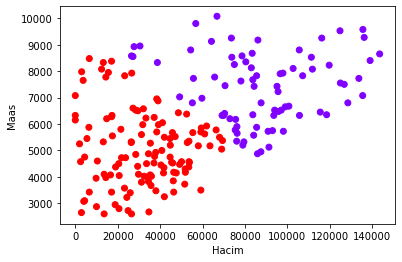

In [233]:
plt.scatter(data["Hacim"],data["Maas"],c=data["Kume_Tahmin2"],cmap="rainbow")
plt.xlabel("Hacim")
plt.ylabel("Maas")
plt.show()

In [234]:
k_means2.cluster_centers_

array([[ 0.97654956,  0.80226664],
       [-0.62435136, -0.51292458]])

In [235]:
k_means2.inertia_

195.7575354926614